In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

In [2]:
def fit_curve():
    # Define the skewed bell curve
    x = np.linspace(-5, 20, 2000)

    best_match = None
    best_diff = float('inf')  # Initialize with a large value

    # Iteratively adjust the parameters to fit the given data
    for a in np.linspace(-10, -1, 500):
        for loc in np.linspace(9.5, 10.5, 501):  # A wider search around the 10% mark
            y = skewnorm.pdf(x, a, loc, 5)
            cdf = skewnorm.cdf(x, a, loc, 5)
            
            # Checking for the position where CDF is 0.85
            index_85 = np.where(cdf >= 0.85)[0][0]
            index_13 = np.where(x >= 13)[0][0]
            elite_area = 1 - cdf[index_13]

            # We want to minimize the difference from the required conditions
            diff = abs(x[index_85] - 10) + abs(elite_area - 0.005)
            
            if diff < best_diff:
                best_diff = diff
                best_match = (x, y / np.sum(y), a, loc)

    if not best_match:
        raise ValueError("No suitable match found based on the given conditions. Please adjust the conditions or the range of parameters.")
    
    return best_match

x, y_percentage, a, loc = fit_curve()

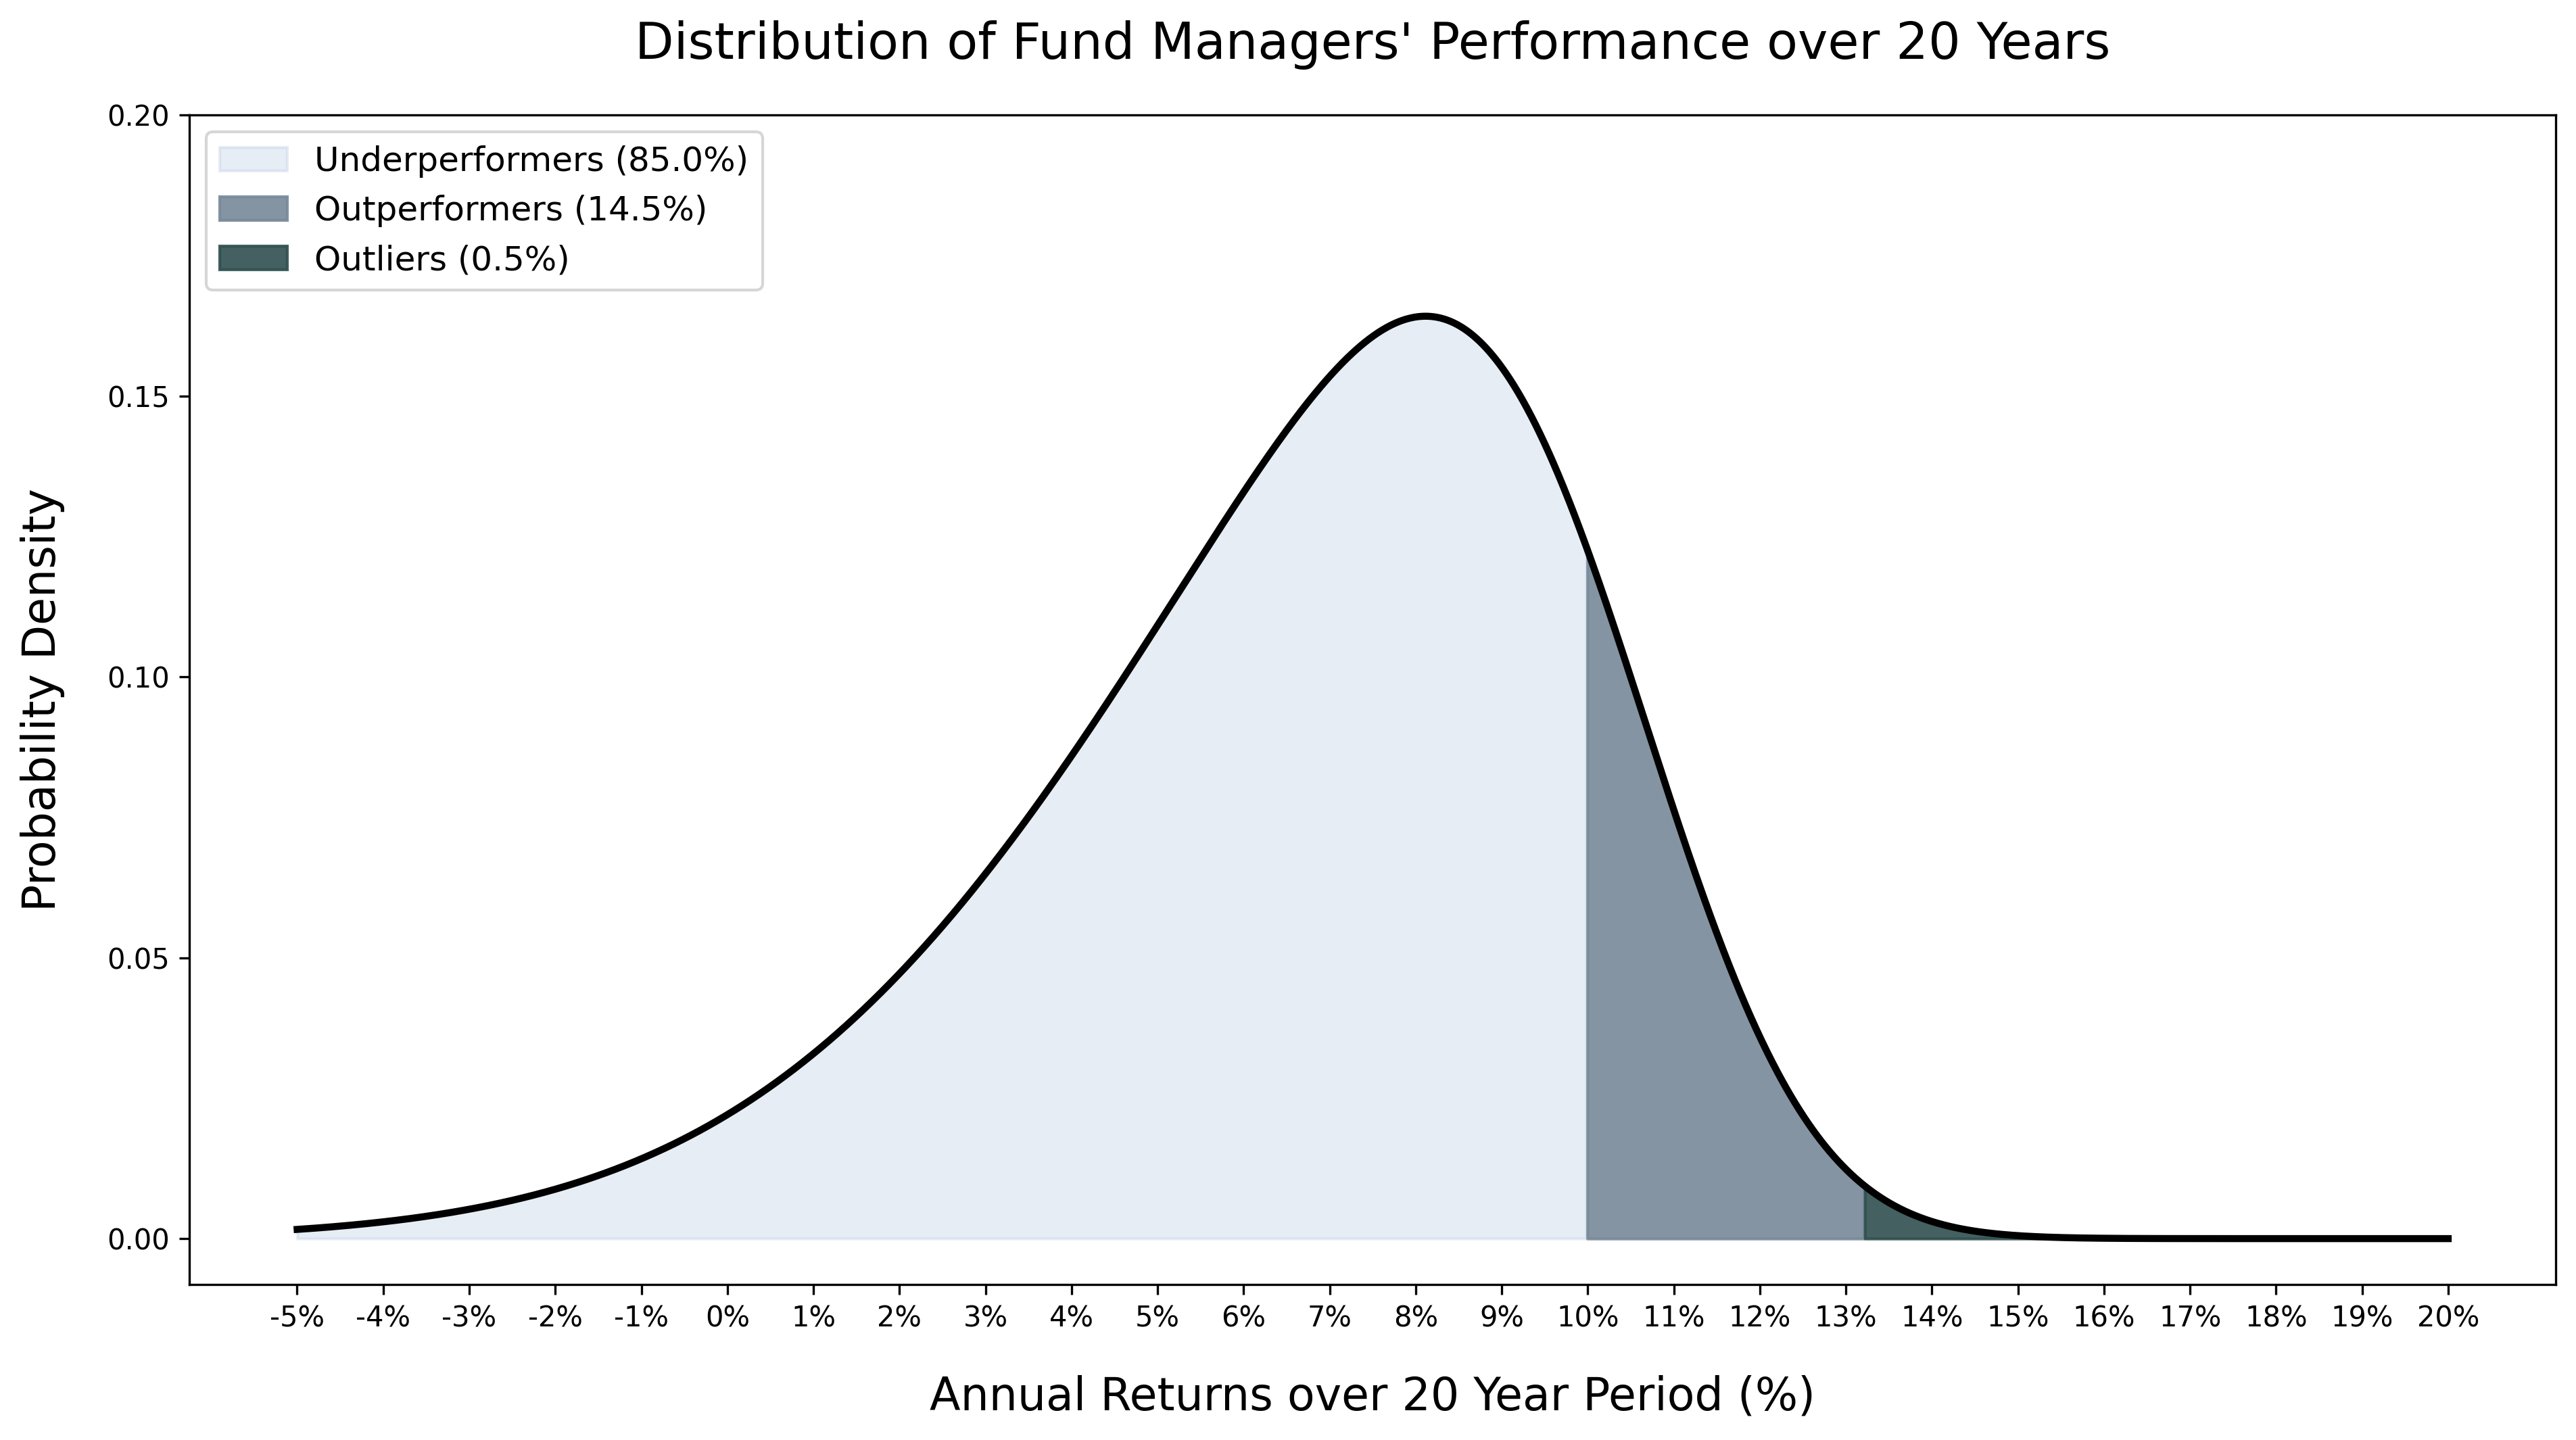

In [3]:
plt.figure(figsize=(12.8, 7.2), dpi=300)
plt.plot(x, y_percentage * 100, color='black', linewidth=2.5)

# Using the CDF to define our bounds
cdf = skewnorm.cdf(x, a, loc, 5)
underperformers_bound = x[np.where(cdf >= 0.85)[0][0]]
elite_bound = x[np.where(cdf >= 0.995)[0][0]]

colors = ["#B0C4DE", "#778899", "#2F4F4F"]
plt.fill_between(x, y_percentage * 100, where=(x < underperformers_bound), color=colors[0], alpha=0.3, label=f"Underperformers ({(y_percentage[x < underperformers_bound] * 100).sum():.1f}%)")
plt.fill_between(x, y_percentage * 100, where=((x >= underperformers_bound) & (x < elite_bound)), color=colors[1], alpha=0.9, label=f"Outperformers ({(y_percentage[(x >= underperformers_bound) & (x < elite_bound)] * 100).sum():.1f}%)")
plt.fill_between(x, y_percentage * 100, where=(x >= elite_bound), color=colors[2], label=f"Outliers ({(y_percentage[x >= elite_bound] * 100).sum():.1f}%)", alpha=0.9)

# Adjusting Y-axis labels based on the specified range
y_interval = 0.05  # every 0.05%
yticks = np.arange(0, 0.21, y_interval)  # Adjusted to show up to 0.20%
yticklabels = [f"{val:.2f}" for val in yticks]  # Removed the % symbol
plt.yticks(yticks, yticklabels)

# Adjust x-ticks with '%' symbol for each percentage
xticks = np.arange(-5, 21, 1)
xticklabels = [f"{val}%" for val in xticks]
plt.xticks(xticks, xticklabels)

# Additional plot settings
plt.title("Distribution of Fund Managers' Performance over 20 Years", fontsize=18, pad=20)
plt.xlabel("Annual Returns over 20 Year Period (%)", fontsize=16, labelpad=15)
plt.ylabel("Probability Density", fontsize=16, labelpad=15)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.show()